In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

<IPython.core.display.Javascript object>


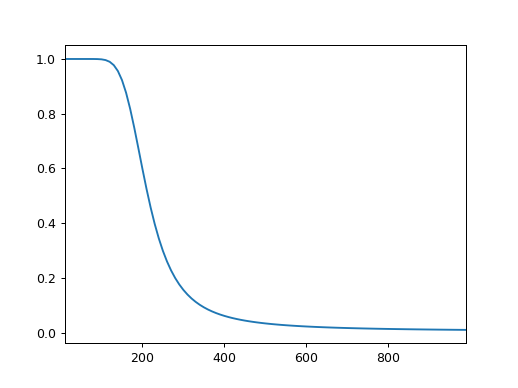

interactive(children=(IntSlider(value=-1000, description='deltaH (J/mol)', max=20000, min=-20000, step=100), I…

In [3]:
%matplotlib nbagg

fig,ax = plt.subplots()
def gamma_1site(H,S,p):
    T = np.arange(10,1000,10)
    R = 8.314 #J mol^-1 K^-1
    G = H - T*S
    gamma = np.exp(-G/(R*T))*p/(1+np.exp(-G/(R*T))*p)
    #plt.cla()
    
    ax.clear()
    ax.plot(T,gamma)
    ax.set_xlim(T[0],T[-1])
    
    



H = widgets.IntSlider(min = -20000,max = 20000,step = 100,value = -1000, description = 'deltaH (J/mol)')
S = widgets.IntSlider(min = -200, max = 200,value = -10, step = 1, description = 'deltaS (j/(mol K))')
p = widgets.FloatSlider(min=0,max = 5,value=1,step = 0.01, description = 'Pressure (bar)')

widgets.interactive(gamma_1site,H=H,S=S,p=p)

<IPython.core.display.Javascript object>


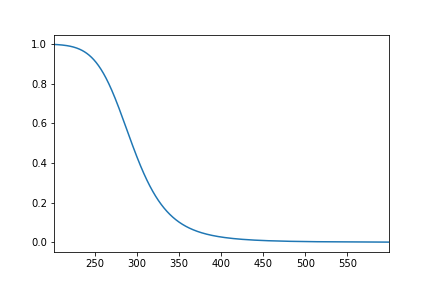

interactive(children=(IntSlider(value=-18000, description='$\\Delta$H (J/mol)', max=20000, min=-50000, step=10…

In [13]:
%matplotlib nbagg
fig,ax = plt.subplots()
def gamma_1site_coop(H,S,J,p):
    R = 8.314
    gamma = np.arange(0.001,0.999,0.001)
    T = (H-2*J*(2*gamma-1))/(S-R*np.log(gamma/(p*(1-gamma))))
    ax.clear()
    ax.plot(T,gamma)
    ax.set_xlim(T[-1],T[0])


H = widgets.IntSlider(min = -50000,max = 20000,step = 100,value = -18000, description = '$\Delta$H (J/mol)')
S = widgets.IntSlider(min = -200, max = 200,value = -100, step = 1, description = '$\Delta$S (J/(mol K))')
p = widgets.FloatSlider(min=0.01,max = 5,value=1, step =0.01, description = 'Pressure (bar)')
J = widgets.IntSlider(min = -5000,max = 5000,value = 0, description = 'interaction term (J/(mol K))')

widgets.interactive(gamma_1site_coop,H=H,S=S,p=p, J=J)

<IPython.core.display.Javascript object>


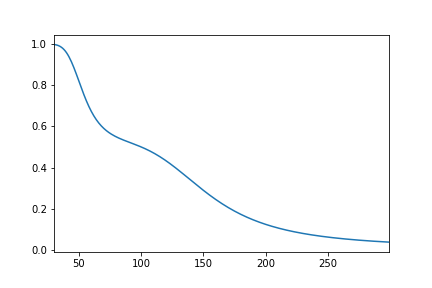

interactive(children=(IntSlider(value=-5000, description='deltaH (J/mol)', max=10000, min=-20000, step=100), I…

In [22]:
%matplotlib nbagg
plt.figure()
p = 0.067

minads = -20.879
maxads = 707

def twosite_intra_only(H,S,Jab):
    R = 8.314
    T =  np.arange(30,300,1)
    G = -1*(H - T*S)
    gamma = (np.exp(G/(R*T))+np.exp(2*Jab/(R*T)))/(np.exp(-G/(R*T))+np.exp(G/(R*T))+2*np.exp(2*Jab/(R*T)))
    plt.cla()
    plt.plot(T,gamma)
    plt.xlim(T[0],T[-1])

H = widgets.IntSlider(min = -20000,max = 10000,step = 100,value = -5000, description = 'deltaH (J/mol)')
S = widgets.IntSlider(min = -200, max = 200,value = -50, step = 1, description = 'deltaS (j/(mol K))')
#p = widgets.IntSlider(min=0,max = 20,value=1, description = 'Pressure (bar)')
Jab = widgets.IntSlider(min = -3000,max = 3000,value = 0, description = 'interaction term')

widgets.interactive(twosite_intra_only, H=H, S=S, Jab=Jab)

<IPython.core.display.Javascript object>


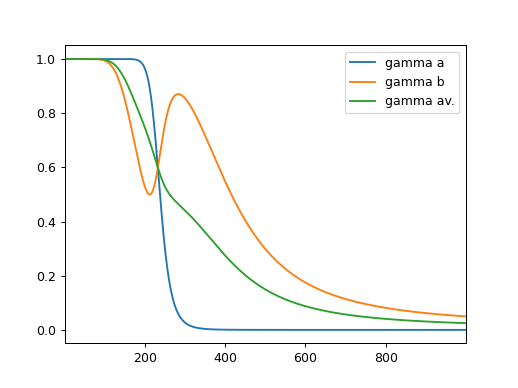

interactive(children=(IntSlider(value=-10000, description='deltaHa (J/mol)', max=2000, min=-50000, step=10), I…

<function __main__.twosite_intra_2(Ha, Hb, Sa, Sb, Jab)>

In [4]:
%matplotlib nbagg

plt.figure()
def twosite_intra_2(Ha,Hb,Sa,Sb,Jab):
    R = 8.314
    
    T = np.arange(1,1000,1)
    dA = -1*(Ha-T*Sa)
    dB = -1*(Hb-T*Sb)
    S = dA + dB
    D = dA - dB
    #Ga = Ha - T*Sa
    #Gb = Hb - T*Sb
    siga = (2*np.exp(-Jab/(R*T))*np.sinh(S/(R*T)) + 2*np.exp(Jab/(R*T))*np.sinh(D/(R*T)))/ \
    (2*np.exp(-Jab/(R*T))*np.cosh(S/(R*T))+2*np.exp(Jab/(R*T))*np.cosh(D/(R*T)))
    sigb = (2*np.exp(-Jab/(R*T))*np.sinh(S/(R*T)) - 2*np.exp(Jab/(R*T))*np.sinh(D/(R*T)))/ \
    (2*np.exp(-Jab/(R*T))*np.cosh(S/(R*T))+2*np.exp(Jab/(R*T))*np.cosh(D/(R*T)))
    
    gamma_a = (siga+1)/2
    gamma_b = (sigb+1)/2
    gamma_tot = (gamma_a + gamma_b)/2
    sigtot = (siga+sigb)/2
    plt.cla()
    plt.plot(T,gamma_a,label = 'gamma a')
    plt.plot(T,gamma_b,label = 'gamma b')
    plt.plot(T,gamma_tot,label = 'gamma av.')
    plt.xlim(T[0],T[-1])
    plt.legend()
    
Ha = widgets.IntSlider(min = -50000,max = 2000,step = 10,value = -10000, description = 'deltaHa (J/mol)')
Hb = widgets.IntSlider(min = -50000, max = 2000,value = -10000, step = 10, description = 'deltaHb (J/(mol))')
Sa = widgets.IntSlider(min = -200, max = 200,value = -50, step = 1, description = 'deltaSa (J/(mol K))')
Sb = widgets.IntSlider(min = -200, max = 200,value = -50, step = 1, description = 'deltaSb (J/(mol K))')

#p = widgets.IntSlider(min=0,max = 20,value=1, description = 'Pressure (bar)')
Jab = widgets.IntSlider(min = -15000,max = 15000,value = 0,step = 10, description = 'interaction term')

widgets.interact(twosite_intra_2,Ha=Ha,Hb=Hb,Sa=Sa,Sb=Sb,Jab=Jab)